In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas import Series,DataFrame
import scipy.optimize

In [2]:
def gompertz(p,t):
    A,mu,lamb,y0 = p
    y = A*np.exp(-np.exp(mu*np.exp(1)/a*(lamb-t)+1))+y0
    return y

In [3]:
def residuals(p,t,y):
    return y-gompertz(p,t)

In [5]:
data = pd.ExcelFile('ART_coverage2.xlsx')
dframe = data.parse('Data')
dframe2 = dframe.pivot_table(index='Country Name',columns='Year',values='Value')
dframe2 = dframe2.dropna(axis=0,how='all')
dframe2 = dframe2.dropna(axis=1,how='all')
diff = dframe2.diff(axis=1)
diff.fillna(0,inplace=True)

In [13]:
t = np.arange(0,15)
y = np.asarray(dframe2.ix['Argentina'])

In [17]:
y0_guess = y[0]
mu = diff.ix['Argentina'].max()
a = 1
lamb = 0
p_guess = (a,mu,lamb,y0_guess)

In [19]:
plsq = scipy.optimize.leastsq(residuals,p_guess,args=(t,y))

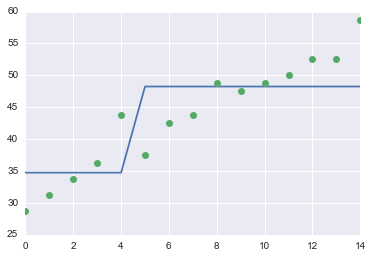

In [24]:
%matplotlib inline
plt.plot(t,gompertz(plsq[0],t),t,y,'o')

In [25]:
plsq

(array([ -1.35000000e+01,  -4.59760239e+08,   4.42486522e+00,
          4.82500000e+01]), 3)